## Problem Statement

Predicting the probability that somebody will experience financial distress in the next two years by using the credit score, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted to the customer of the bank

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy.stats import norm 
from matplotlib import cm
import seaborn as sns

#### Reading the data

In [2]:
df_train = pd.read_csv('../input/GiveMeSomeCredit/cs-training.csv')
df_test = pd.read_csv('../input/GiveMeSomeCredit/cs-test.csv')
df_s = pd.read_csv('../input/GiveMeSomeCredit/sampleEntry.csv')

### EDA

In [3]:
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [5]:
print(df_train.shape)
print(df_test.shape)

(150000, 12)
(101503, 12)


The dataset has **12**  features plus the price along with **150000** observations.

The description for the 12 features is given below:

- ``SeriousDlqin2yrs``	Person experienced 90 days past due delinquency or worse	Y/N
- ``RevolvingUtilizationOfUnsecuredLines``	Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits	percentage
- ``age``	Age of borrower in years	integer
- ``NumberOfTime3059DaysPastDueNotWorse``	Number of times borrower has been 30-59 days past due but no worse in the last 2 years.	integer
- ``DebtRatio``	Monthly debt payments, alimony,living costs divided by monthy gross income	percentage
- ``MonthlyIncome``	Monthly income	real
- ``NumberOfOpenCreditLinesAndLoans``	Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)	integer
- ``NumberOfTimes90DaysLate``	Number of times borrower has been 90 days or more past due.	integer
- ``NumberRealEstateLoansOrLines``	Number of mortgage and real estate loans including home equity lines of credit	integer
- ``NumberOfTime60-89DaysPastDueNotWorse``	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.	integer
- ``NumberOfDependents``	Number of dependents in family excluding themselves (spouse, children etc.)	integer

In [6]:
df_train['Id'] = df_train['Unnamed: 0']

In [7]:
df_train.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Id
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,2
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,3
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,4
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,5


In [9]:
df_test['Id'] = df_test['Unnamed: 0']

In [10]:
df_test.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
df_test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Id
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0,1
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0,2
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0,3
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0,4
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0,5


In [12]:
df_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Id
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222,75000.500000
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086,43301.414527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,37500.750000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,75000.500000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,112500.250000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,150000.000000


##### Checking Null values

In [13]:
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Id                                          0
dtype: int64

In [14]:
df_train.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
Id                                      150000
dtype: int64

In [15]:
df_test.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
Id                                           0
dtype: int64

##### Imputing the null values

In [16]:
df_train['MonthlyIncome'].fillna(df_train['MonthlyIncome'].mean(),inplace=True)

In [17]:
df_train['NumberOfDependents'].fillna(df_train['NumberOfDependents'].mode()[0], inplace=True)

In [18]:
df_test['MonthlyIncome'].fillna(df_test['MonthlyIncome'].mean(),inplace=True)

In [19]:
df_test['NumberOfDependents'].fillna(df_test['NumberOfDependents'].mode()[0], inplace=True)

In [20]:
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
Id                                      0
dtype: int64

In [21]:
df_test.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
Id                                           0
dtype: int64

### Visualization

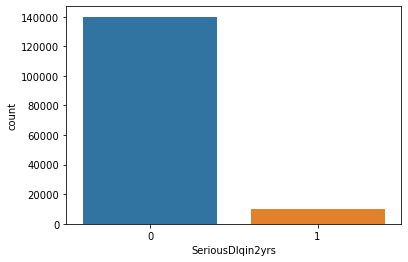

In [22]:
sns.countplot(x='SeriousDlqin2yrs',data=df_train)
plt.show()

As we can see the target variable clases in the above plot, it shows an class imbalance problem

#### Correlation

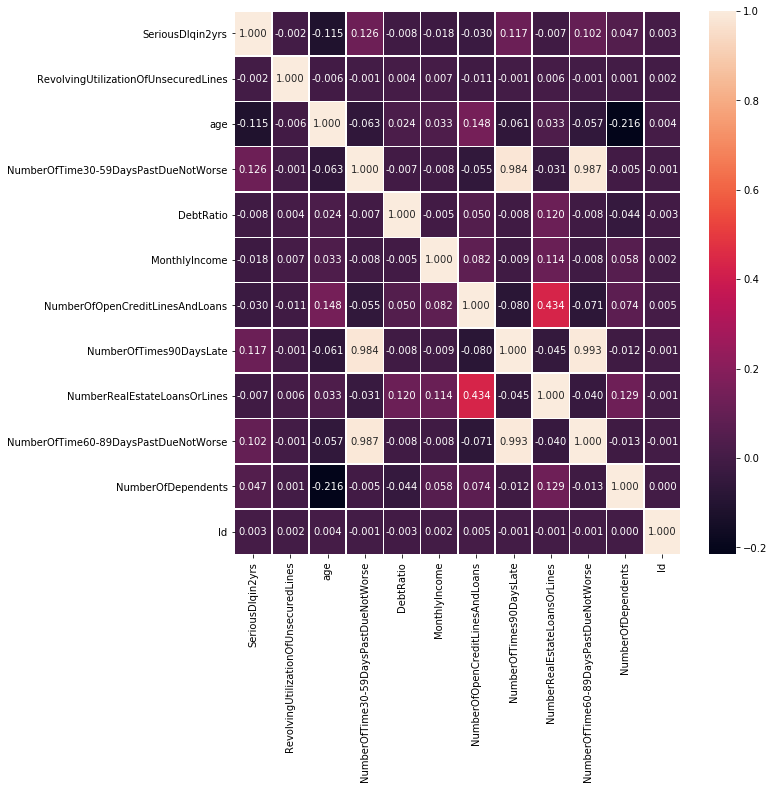

In [23]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)
plt.show()

In [24]:
Id = df_test['Id']

In [25]:
df_train.drop('Id', axis=1, inplace=True)

In [26]:
df_test.drop('Id', axis=1, inplace=True)

### Model Building

In [27]:
X = df_train.drop('SeriousDlqin2yrs',axis=1)
y = df_train['SeriousDlqin2yrs']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X.values, y.values, test_size=0.2, random_state=116214 )

#### Random Forest model

In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
RF = RandomForestClassifier()

In [31]:
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 100, 150],
           "max_depth" : [2,3,5,7,9],
           "min_samples_leaf" : [2, 4, 6, 8]}

In [32]:
RF_random = RandomizedSearchCV(RF, param_distributions=param_grid, cv=5)

In [33]:
RF_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [34]:
best_est_RF = RF_random.best_estimator_

In [35]:
print('Accuracy of classifier on training set: {:.2f}'.format(RF_random.score(X_train, y_train) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(RF_random.score(X_test, y_test) * 100))

Accuracy of classifier on training set: 94.16
Accuracy of classifier on test set: 93.75


In [36]:
y_pred = best_est_RF.predict_proba(X_train)
y_pred = y_pred[:,1]

In [37]:
from sklearn.metrics import roc_curve, auc

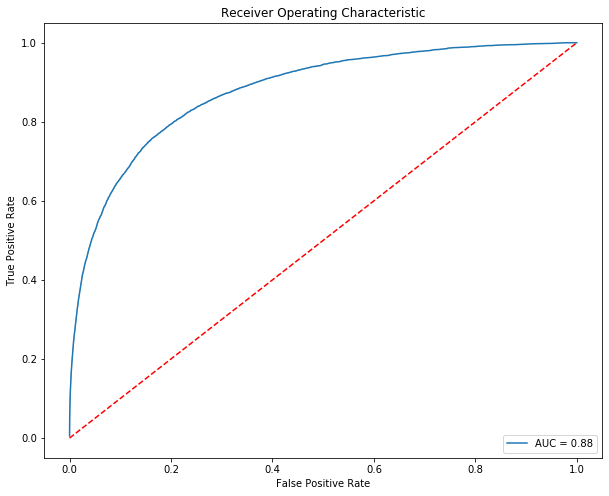

In [38]:
fpr,tpr,_ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
df_test.drop('SeriousDlqin2yrs', axis=1, inplace=True)
y_pred=best_est_RF.predict_proba(df_test)
y_pred= y_pred[:,1]

In [40]:
df_s["Probability"]=y_pred
df_s.head()

,Id,Probability
0,1,0.081046
1,2,0.036523
2,3,0.016972
3,4,0.070737
4,5,0.095763


In [41]:
df_s.to_csv("submission_RF.csv",index=False)

In [42]:
XGB = XGBClassifier(n_jobs=-1) 
 
param_grid = {
                  'n_estimators' :[100,150,200,250,300],
                  "learning_rate" : [0.001,0.01,0.0001,0.05, 0.10 ],
                  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3 ],
                  "colsample_bytree" : [0.5,0.7],
                  'max_depth': [3,4,6,8]
              }

In [43]:
XGB_random = RandomizedSearchCV(XGB, param_distributions=param_grid, cv=5)

In [44]:
XGB_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=10, n_

In [45]:
best_est_XGB = XGB_random.best_estimator_

In [46]:
print('Accuracy of classifier on training set: {:.2f}'.format(XGB_random.score(X_train, y_train) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(XGB_random.score(X_test, y_test) * 100))

Accuracy of classifier on training set: 93.98
Accuracy of classifier on test set: 93.78


In [47]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [48]:
smote = SMOTE(random_state=0)

s_X,s_y=smote.fit_sample(X_train,y_train)

In [49]:
RF_random.fit(s_X,s_y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [50]:
best_est_RF1 = RF_random.best_estimator_

In [51]:
print('Accuracy of classifier on training set: {:.2f}'.format(RF_random.score(s_X,s_y) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(RF_random.score(s_X,s_y) * 100))

Accuracy of classifier on training set: 92.57
Accuracy of classifier on test set: 92.57


In [52]:
y_pred_RF1 = best_est_RF1.predict_proba(X_train)
y_pred_RF1 = y_pred_RF1[:,1]

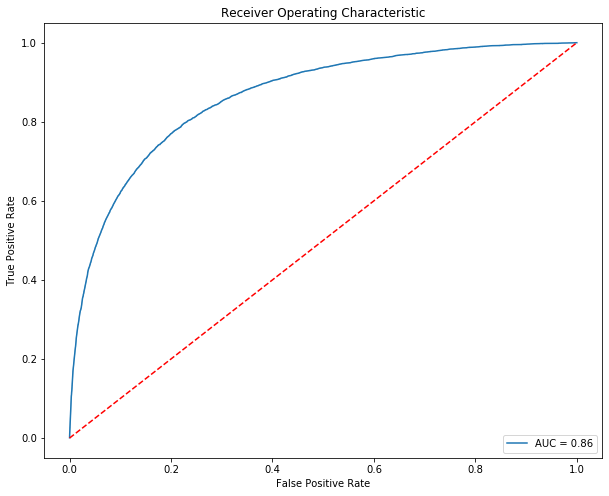

In [53]:
fpr,tpr,_ = roc_curve(y_train, y_pred_RF1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
prediction_RF = best_est_RF1.predict_proba(df_test)
prediction_RF = prediction_RF[:,1]

In [55]:
df_s["Probability"]=prediction_RF
df_s.head()

,Id,Probability
0,1,0.221699
1,2,0.331786
2,3,0.063610
3,4,0.249229
4,5,0.265643


In [56]:
df_s.to_csv("submission_RF_S.csv",index=False)